##Importing Necessary Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Loading the Dataset

In [2]:
df_t= pd.read_csv("twitter_training.csv", sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])
df_v= pd.read_csv("twitter_validation.csv", sep=',', names=['Tweet_ID','Entity','Sentiment','Tweet_content'])

In [3]:
df_t.head()


,Tweet_ID,Entity,Sentiment,Tweet_content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [4]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
df_v.head()

,Tweet_ID,Entity,Sentiment,Tweet_content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [6]:
df_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       1000 non-null   int64 
 1   Entity         1000 non-null   object
 2   Sentiment      1000 non-null   object
 3   Tweet_content  1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


##Data Visualization

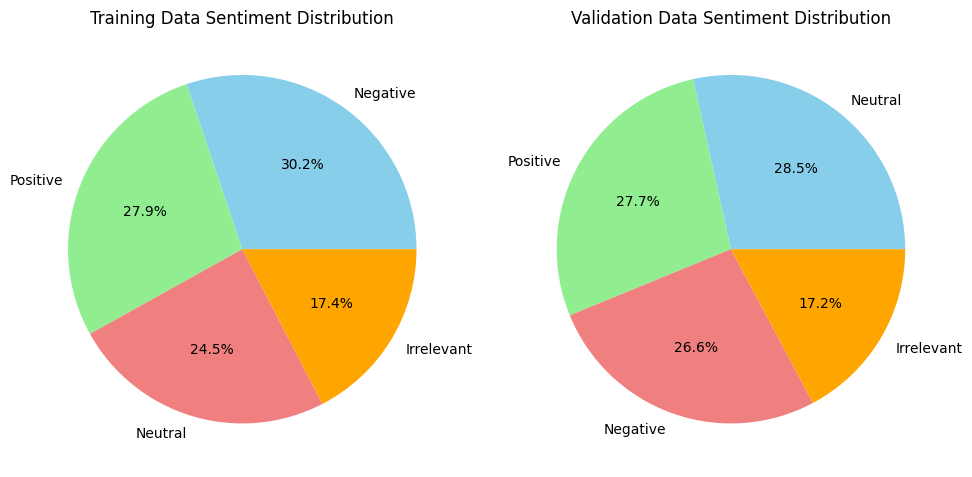

In [7]:
# Calculate the number of sentiment labels in training data and validation data
train_sentiment_counts = df_t['Sentiment'].value_counts()
valid_sentiment_counts = df_v['Sentiment'].value_counts()

# Draw a pie chart for the training data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')

# Draw a pie chart for the valid data
plt.subplot(1, 2, 2)
plt.pie(valid_sentiment_counts, labels=valid_sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')

plt.tight_layout()
plt.show()

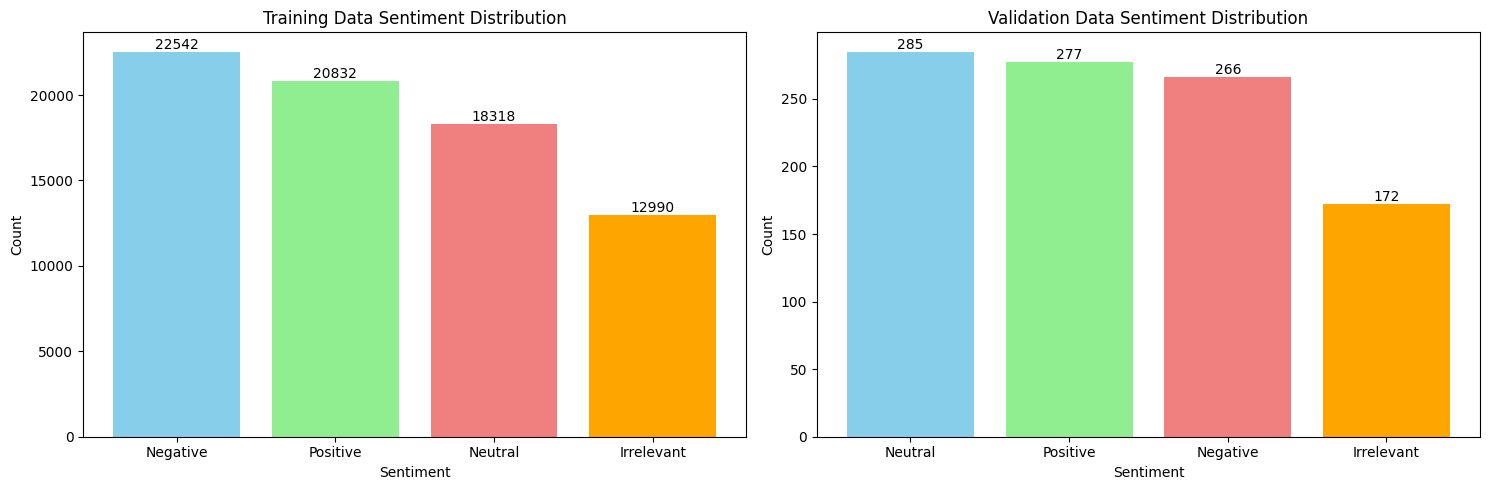

In [8]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(train_sentiment_counts.index, train_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Training Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(train_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')


plt.subplot(1, 2, 2)
plt.bar(valid_sentiment_counts.index, valid_sentiment_counts.values, color=['skyblue', 'lightgreen', 'lightcoral', 'orange'])
plt.title('Validation Data Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display quantity in each column
for i, count in enumerate(valid_sentiment_counts.values):
    plt.text(x=i, y=count, s=str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

###Converting text data to numpy arrays and Convert labels to integers for use during training

In [9]:
# Get the column 'Tweet_content' and assign it to an array
train_sentences = df_t['Tweet_content'].to_numpy()
valid_sentences = df_v['Tweet_content'].to_numpy()

In [10]:
# Convert the Sentiment value to the corresponding number
label_mapping = {'Positive': 0, 'Negative': 1,'Neutral' : 2,'Irrelevant': 3,}
train_label = df_t['Sentiment'].map(label_mapping)
valid_label = df_v['Sentiment'].map(label_mapping)

In [11]:
print(train_sentences)
train_label

['im getting on borderlands and i will murder you all ,'
 'I am coming to the borders and I will kill you all,'
 'im getting on borderlands and i will kill you all,' ...
 'Just realized the windows partition of my Mac is now 6 years behind on Nvidia drivers and I have no idea how he didn’t notice'
 'Just realized between the windows partition of my Mac is like being 6 years behind on Nvidia drivers and cars I have no fucking idea how I ever didn ’ t notice'
 'Just like the windows partition of my Mac is like 6 years behind on its drivers So you have no idea how I didn’t notice']


0        0
1        0
2        0
3        0
4        0
        ..
74677    0
74678    0
74679    0
74680    0
74681    0
Name: Sentiment, Length: 74682, dtype: int64

In [12]:
print(valid_sentences[:10])  # Show the first 10 elements of the array
valid_label

['I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'
 "BBC News - Amazon boss Jeff Bezos rejects claims company acted like a 'drug dealer' bbc.co.uk/news/av/busine…"
 '@Microsoft Why do I pay for WORD when it functions so poorly on my @SamsungUS Chromebook? 🙄'
 "CSGO matchmaking is so full of closet hacking, it's a truly awful game."
 'Now the President is slapping Americans in the face that he really did commit an unlawful act after his  acquittal! From Discover on Google vanityfair.com/news/2020/02/t…'
 'Hi @EAHelp I’ve had Madeleine McCann in my cellar for the past 13 years and the little sneaky thing just escaped whilst I was loading up some fifa points, she took my card and I’m having to use my paypal account but it isn’t working, can you help me resolve it please?'
 'Thank you @EAMaddenNFL!

0      3
1      2
2      1
3      1
4      2
      ..
995    3
996    3
997    0
998    0
999    2
Name: Sentiment, Length: 1000, dtype: int64

In [13]:
print(train_sentences[0])
train_label[0]

im getting on borderlands and i will murder you all ,


0

##Removing Emojis in Sentence

In [19]:
def remove_emojis(text):
    if isinstance(text, str):
        # Perform operations on the string
        return processed_text
    else:
        return text  # Return the input unchanged if it's not a string


In [21]:
import re

def remove_emojis(text):
    if isinstance(text, str):
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    else:
        return text

# Create an array to store sentences with emojis removed
remove_emoji_train_sentences = [remove_emojis(sentence) for sentence in train_sentences]
remove_emoji_valid_sentences = [remove_emojis(sentence) for sentence in valid_sentences]


In [22]:
print(remove_emoji_train_sentences[:10])
print(remove_emoji_valid_sentences[:10])

['im getting on borderlands and i will murder you all ,', 'I am coming to the borders and I will kill you all,', 'im getting on borderlands and i will kill you all,', 'im coming on borderlands and i will murder you all,', 'im getting on borderlands 2 and i will murder you me all,', 'im getting into borderlands and i can murder you all,', "So I spent a few hours making something for fun. . . If you don't know I am a HUGE @Borderlands fan and Maya is one of my favorite characters. So I decided to make myself a wallpaper for my PC. . Here is the original image versus the creation I made :) Enjoy! pic.twitter.com/mLsI5wf9Jg", "So I spent a couple of hours doing something for fun... If you don't know that I'm a huge @ Borderlands fan and Maya is one of my favorite characters, I decided to make a wallpaper for my PC.. Here's the original picture compared to the creation I made:) Have fun! pic.twitter.com / mLsI5wf9Jg", "So I spent a few hours doing something for fun... If you don't know I'm 

##Converting our labels to one-hot-encoding values

In [23]:
from sklearn.preprocessing import LabelBinarizer

In [24]:
#Converted our labels to one-hot-encoding values. Ex : 1 ----->[0,1,0,0,0,0,0,0,0,0]
lb = LabelBinarizer()

In [25]:
train_label = lb.fit_transform(train_label)
valid_label = lb.fit_transform(valid_label)

In [26]:
print(train_label[0])

[1 0 0 0]


##Creating Vocabulary

In [27]:
vocabulary_size = 10000

embedding_dim = 64

max_length_sentence = 150

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

###Text vectorization turns each text into a string of integers (each integer is the index of the token in the dictionary)

In [29]:
tokenizer = Tokenizer(num_words=vocabulary_size , oov_token = 'OOV', lower = True,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')

In [31]:
# Filter out any non-string elements and convert them to empty strings
remove_emoji_train_sentences = [str(sentence) for sentence in remove_emoji_train_sentences]

# Fit tokenizer on the filtered sentences
tokenizer.fit_on_texts(remove_emoji_train_sentences)


In [32]:
# If you want to display both you can use this syntax : tokenizer.word_index
print(list(tokenizer.word_index.items())[:50])  # Display the first 10 key-value pairs

[('OOV', 1), ('the', 2), ('i', 3), ('to', 4), ('and', 5), ('a', 6), ('of', 7), ('is', 8), ('in', 9), ('for', 10), ('this', 11), ('it', 12), ('you', 13), ('on', 14), ('my', 15), ('that', 16), ('com', 17), ('with', 18), ('game', 19), ('so', 20), ('be', 21), ('me', 22), ('have', 23), ('just', 24), ('but', 25), ('not', 26), ('are', 27), ('all', 28), ('at', 29), ('was', 30), ('like', 31), ('out', 32), ('from', 33), ('2', 34), ('your', 35), ('pic', 36), ('twitter', 37), ('now', 38), ('get', 39), ('we', 40), ('as', 41), ('they', 42), ('if', 43), ('has', 44), ('one', 45), ('do', 46), ('good', 47), ('t', 48), ('about', 49), ('can', 50)]


##Standardize train data

###Converting sentences from text to numeric strings, based on the previously created vocabulary dictionary.

In [33]:
remove_emoji_train_sentences = tokenizer.texts_to_sequences(remove_emoji_train_sentences)

###The padding strings in the sentence have the same length

In [34]:
padding_train_sentences = pad_sequences(remove_emoji_train_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [35]:
padding_train_sentences

array([[ 307,  175,   14, ...,    0,    0,    0],
       [   3,  121,  403, ...,    0,    0,    0],
       [ 307,  175,   14, ...,    0,    0,    0],
       ...,
       [  24, 1976,    2, ...,    0,    0,    0],
       [  24, 1976,  753, ...,    0,    0,    0],
       [  24,   31,    2, ...,    0,    0,    0]], dtype=int32)

In [36]:
padding_train_sentences.shape

(74682, 150)

##Standardize validation data

In [37]:
remove_emoji_valid_sentences = tokenizer.texts_to_sequences(remove_emoji_valid_sentences)
padding_valid_sentences = pad_sequences(remove_emoji_valid_sentences, maxlen=max_length_sentence,truncating='post',padding='post')

In [38]:
padding_valid_sentences.shape

(1000, 150)

##Building the Model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,Flatten,Dense

In [40]:
model = Sequential()

model.add(Embedding(vocabulary_size,embedding_dim,input_length=max_length_sentence))

model.add(Flatten())

model.add(Dense(10,activation='relu'))

model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 64)           640000    
                                                                 
 flatten (Flatten)           (None, 9600)              0         
                                                                 
 dense (Dense)               (None, 10)                96010     
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
Total params: 736054 (2.81 MB)
Trainable params: 736054 (2.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
history = model.fit(padding_train_sentences,train_label,epochs=20,validation_data=(padding_valid_sentences,valid_label))

Epoch 1/20
2334/2334 [==============================] - 33s 14ms/step - loss: 0.9004 - accuracy: 0.6251 - val_loss: 0.2996 - val_accuracy: 0.9190
Epoch 2/20
2334/2334 [==============================] - 31s 13ms/step - loss: 0.3497 - accuracy: 0.8735 - val_loss: 0.1056 - val_accuracy: 0.9790
Epoch 3/20
2334/2334 [==============================] - 31s 13ms/step - loss: 0.1909 - accuracy: 0.9280 - val_loss: 0.0900 - val_accuracy: 0.9800
Epoch 4/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.1381 - accuracy: 0.9465 - val_loss: 0.1193 - val_accuracy: 0.9690
Epoch 5/20
2334/2334 [==============================] - 29s 12ms/step - loss: 0.1181 - accuracy: 0.9529 - val_loss: 0.0924 - val_accuracy: 0.9770
Epoch 6/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.1058 - accuracy: 0.9567 - val_loss: 0.1328 - val_accuracy: 0.9750
Epoch 7/20
2334/2334 [==============================] - 30s 13ms/step - loss: 0.0986 - accuracy: 0.9588 - val_loss: 0.1244 -

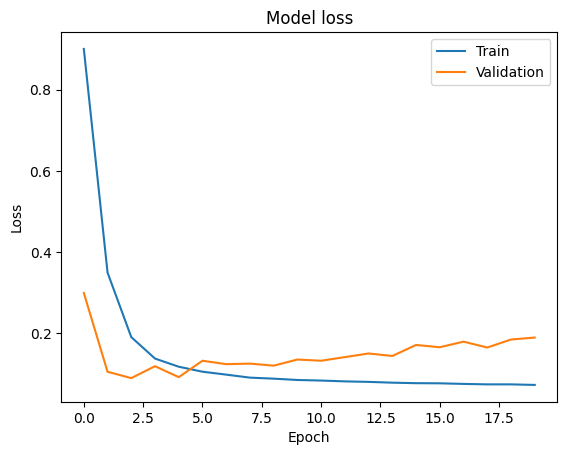

In [45]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


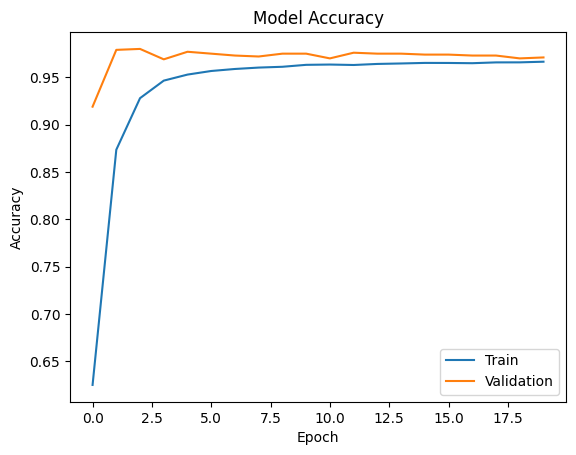

In [44]:
# Plot the accuracy of training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [53]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy = accuracy_score(valid_label, binary_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.97


In [46]:
from sklearn.metrics import classification_report

predictions = model.predict(padding_valid_sentences)

# Convert predictions to binary labels (0 or 1) based on a threshold (e.g., 0.5 for binary classification)
binary_predictions = (predictions > 0.5).astype(int)

# Compute and print the classification report
print(classification_report(valid_label, binary_predictions))


32/32 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       277
           1       0.96      0.98      0.97       266
           2       0.99      0.96      0.97       285
           3       0.98      0.98      0.98       172

   micro avg       0.98      0.97      0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.97      1000
 samples avg       0.97      0.97      0.97      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
